In [1]:
#import OS module for path setups
import os

In [11]:
#defining pretrained model details, tfrecord scripts path and label_map.pbtxt 
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [12]:
#defining paths for folder structure 
paths = {
    'WORKSPACE_PATH': os.path.join('tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('tensorflow','Tfrecord'),
    'APIMODEL_PATH': os.path.join('tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFLITE_PATH':os.path.join('tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('tensorflow','protoc')
 }

In [13]:
#path check
paths['IMAGE_PATH']

'tensorflow\\workspace\\images'

In [14]:
#definig file paths
files = {
    'PIPELINE_CONFIG':os.path.join('tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [15]:
#creating paths
for path in paths.values():
    if not os.path.exists(path):
        !mkdir {path}

In [7]:
#To import gitup repositories
!pip install wget
import wget

In [8]:
#creating path if doesnt exist and cloning the tensorflow model repository
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [18]:
#download protobuf repository
#move it to protoc path
#set protoc to the environment variables
#run the protoc in research folder
#copy the setup.py file from object_detection packages tf2 folder and paste it in research directory 
#Install the setup file in research folder(Install Tensorflow object detection)

url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
wget.download(url)
!move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
!cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
!cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-310: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-310: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-310: module MAY be using inspect.stack


Obtaining file:///D:/DL_finalProject/tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [9]:
#Run the script to verify the installations
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.10.4: D:\DL_finalProject\dlenv\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-04-17 14:08:27.067737: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-17 14:08:27.916389: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1369 MB memory:  -> device: 0, name: NVIDIA GeForce 940M, pci bus id: 0000:04:00.0, compute capability: 5.0
D:\DL_finalProject\dlenv\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\builders\model_builder.py:1102: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch

In [16]:
#installed apache-beam as i got an module not found error before
!pip install apache-beam

  Using cached apache_beam-2.37.0-py3-none-any.whl
  Using cached pyarrow-6.0.1-cp310-cp310-win_amd64.whl (15.5 MB)
  Using cached cloudpickle-2.0.0-py3-none-any.whl (25 kB)
  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
  Using cached hdfs-2.7.0-py3-none-any.whl (34 kB)
  Using cached fastavro-1.4.10-cp310-cp310-win_amd64.whl (417 kB)
  Using cached httplib2-0.19.1-py3-none-any.whl (95 kB)
  Using cached proto_plus-1.20.3-py3-none-any.whl (46 kB)
  Using cached orjson-3.6.7-cp310-none-win_amd64.whl (186 kB)
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
  Using cached pymongo-3.12.3-cp310-cp310-win_amd64.whl (398 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached dill-0.3.1.1-py3-none-any.whl
  Using cached numpy-1.21.6-cp310-cp310-win_amd64.whl (14.0 MB)
  Using cached crcmod-1.7-py3-none-any.whl
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Attempting uninstall: pyparsi

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pandas, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
object-detection 0.1 requires tensorflow_io, which is not installed.
object-detection 0.1 requires tf-models-official>=2.5.1, which is not installed.


In [17]:
#installing the modules which were not installed
!pip install avro-python3 contextlib2 Cython lvis matplotlib pandas pillow pycocotools tensorflow_io tf-models-official>=2.5.1

In [111]:
#command to upgrade tensorflow GPU
!pip install tensorflow-gpu --upgrade

In [9]:
import object_detection

In [113]:
!pip list

Package                       Version             Editable project location
----------------------------- ------------------- --------------------------------------------------
absl-py                       1.0.0
apache-beam                   2.37.0
asttokens                     2.0.5
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
cachetools                    5.0.0
certifi                       2021.10.8
charset-normalizer            2.0.12
cloudpickle                   2.0.0
colorama                      0.4.4
contextlib2                   21.6.0
crcmod                        1.7
cycler                        0.11.0
Cython                        0.29.28
debugpy                       1.6.0
decorator                     5.1.1
dill                          0.3.1.1
dm-tree                       0.1.7
docopt                        0.6.2
entrypoints                   0.4
executing                     0.8.3
fastavro              

In [10]:
#Downloading the pretrained model moving it to PRETRAINED_MODEL_PATH and unziping the folder
wget.download(PRETRAINED_MODEL_URL)
!move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [16]:
#labelmap.pbtxt file defination
labels = [{'name':'cat', 'id':1}, {'name':'dog', 'id':2}]
#open file labelmap in which the labels will be written using below command
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [17]:
#this will execute if the  following file doesnt exist
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [10]:
#creates train and test records respectively
import xml.etree.ElementTree
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'validation')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: tensorflow\workspace\annotations\test.record


In [74]:
#this statement copies the pipeline.config to models folder
!copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


In [17]:
#importing modules to modifiy configuration file
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [18]:
#defining variable config in which the configuaration information will be stored for further modification according to the custom dataset
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [76]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [77]:
# defined the changes to be made to the copied config file with respective to the custom dataset.
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [78]:
#writing the changes in config file 
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [18]:
#defining variable training_Script which contain the path of model_main_tf2.py
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [19]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=20000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])
print(command)
#Command used for training the model with 30000 training steps  executed the below script in command prompt,
#.ckpt files will be generated based on the training no. of steps and the data file will be created under the checkpoint path in a new train folder.

python tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=20000


# 7. Evaluate the Model

In [82]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])
print(command)
#data file will be created under the checkpoint path in a new eval folder.

python tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=tensorflow\workspace\models\my_ssd_mobnet


In [84]:
#importing modules
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [85]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-21')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [86]:
#importing libraries
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [87]:
#defining variable category_index which stores the index of the classes present in labelmap
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [88]:
#stroing sample image path
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'cgcheck4.webp')

In [89]:
IMAGE_PATH

'tensorflow\\workspace\\images\\cgcheck4.webp'

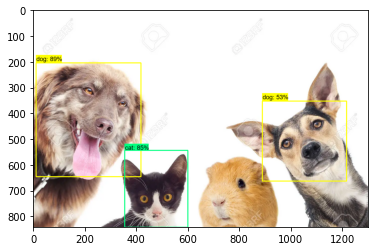

In [90]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [49]:
#path for exporting model as saved_model.pb with its variables freezing script
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [50]:
#executes exporter_main_v2.py taking training checkpoint folder path with input type as image tensor and saves the variables, saved_model.pb file in save_model folder 
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])
print(command)

In [52]:
!{command}

2022-04-18 00:01:44.951181: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-18 00:01:45.773046: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1363 MB memory:  -> device: 0, name: NVIDIA GeForce 940M, pci bus id: 0000:04:00.0, compute capability: 5.0
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0418 00:01:47.738565 12816 deprecation.py:610] From D:\DL_finalProject\dlenv\lib\site-packages\tensorflow\python\autograph\impl\api.py:458: calling map_fn_v2 (from

# 12. Conversion to TFLite

In [21]:
#Freezing graph for tflite scriptpath
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [22]:
#executes export_tflite_graph_tf2.py taking trained checkpoint folder path and config file and saves the saved_model.pb file, variables with a folder named saved_model in TFLITE path
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])
print(command)

python tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=tensorflow\workspace\models\my_ssd_mobnet --output_directory=tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [57]:
!{command}

2022-04-18 00:11:03.967582: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-18 00:11:04.823480: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1369 MB memory:  -> device: 0, name: NVIDIA GeForce 940M, pci bus id: 0000:04:00.0, compute capability: 5.0
2022-04-18 00:11:15.051347: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1369 MB memory:  -> device: 0, name: NVIDIA GeForce 940M, pci bus id: 0000:04:00.0, compute capability: 5.0
2022-04-18 00:11:18.153822: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU

In [23]:
#freezed graph path to create detect.tflite file
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [24]:
#changes the input shape to 1,300,300,3
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [25]:
print(command)

tflite_convert --saved_model_dir=tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [26]:
!{command}

Estimated count of arithmetic ops: 1.702 G  ops, equivalently 0.851 G  MACs


2022-04-18 21:58:08.925056: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-18 21:58:17.286441: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1369 MB memory:  -> device: 0, name: NVIDIA GeForce 940M, pci bus id: 0000:04:00.0, compute capability: 5.0
2022-04-18 21:58:33.397774: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-04-18 21:58:33.397859: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-04-18 21:58:33.432157: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: tensorflow\workspace\models\my_ssd_mobnet\tflit

In [ ]:
!pip install tflite_support_nightly

In [ ]:
#installed the modules and executed the ObjectDetectorWriter for creating metadata in detect.tflite which will be used in android studio for building application
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import writer_utils

In [ ]:
#code is executed in collab and attaching the metadatawriter code with output in the documents submission
ObjectDetectorWriter = object_detector.MetadataWriter
_MODEL_PATH = "/content/drive/MyDrive/models/detect.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "/content/drive/MyDrive/labelmap.txt"
_SAVE_TO_PATH = "/content/drive/MyDrive/models/detectmeta.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ObjectDetectorWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)